In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

current_dir = os.getcwd()
# Append the parent directory to sys.path
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

# ignore warrnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from scripts.oil_price_eda_script import BrentOilPricesEDA

# Load Data
file_path = '../data/BrentOilPrices.csv'  
processor = BrentOilPricesEDA(file_path=file_path)

In [3]:
# Load Data
file_path = '../data/BrentOilPrices.csv'  
processor = BrentOilPricesEDA(file_path=file_path)

In [4]:
data = processor.load_data()
data

2025-02-21 18:26:29,654 - INFO - Data loaded successfully.
2025-02-21 18:26:29,656 - INFO - Data loading completed in 0:00:00.016598.


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37


### Data Preprocessing

In [5]:
# Convert Date column to datetime format with inferred format
data = processor.format_date()

2025-02-21 18:26:29,938 - INFO - Date formatting completed in 0:00:00.242429.


In [6]:
# Check for missing values and fill or drop if necessary
print("Missing values:", data.isnull().sum())
data['Price'] = data['Price'].fillna(method='ffill')  # Forward fill for any missing price data

Missing values: Price    0
dtype: int64


### Exploratory Data Analysis (EDA)

##### Descriptive Statistics: 
- Calculate the mean, median, variance, and standard deviation of daily oil prices over time.

In [7]:
processor.describe_data()

2025-02-21 18:26:29,955 - INFO - Generating descriptive statistics.


,Price
count,9011.00
mean,48.42
std,32.86
min,9.10
25%,19.05
50%,38.57
75%,70.09
max,143.95


##### Trend Analysis: 
- Plot the time series to identify visible trends, seasonality, or patterns in oil prices over the years.

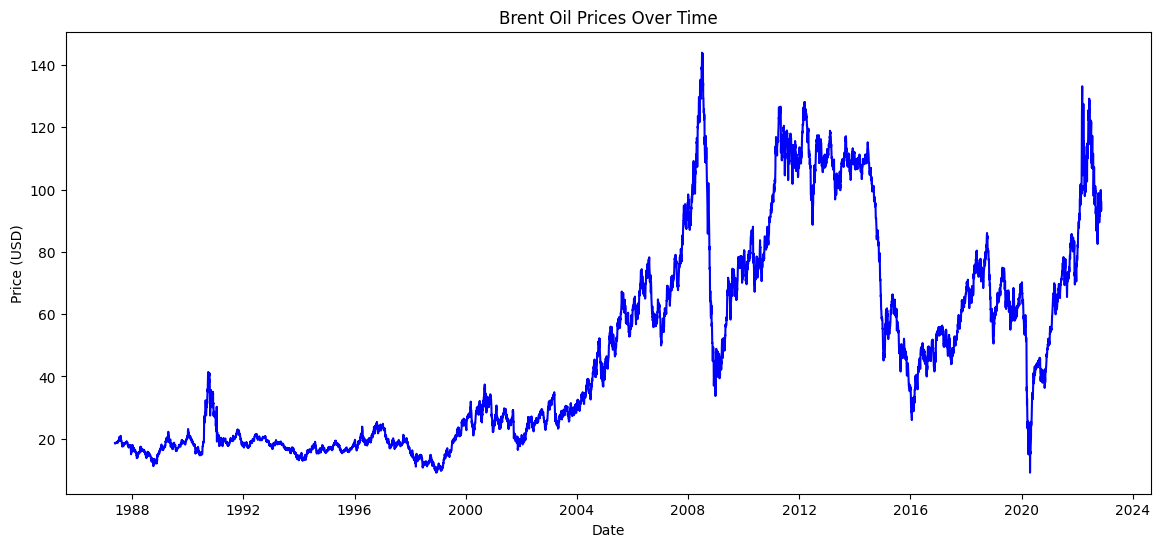

2025-02-21 18:26:30,205 - INFO - Time series plot generated successfully.


In [8]:
# Plot the time series of Brent oil prices
processor.plot_time_series()